In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [20]:
X_train = pd.read_csv("Training Data/Logistic_X_Train.csv")
Y_train = pd.read_csv("Training Data/Logistic_Y_Train.csv")

X_train.shape, Y_train.shape

((3000, 3), (3000, 1))

In [21]:
X_train.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [22]:
Y_train.head()

,label
0,1
1,1
2,1
3,0
4,0


In [23]:
# Extract Values from DataFrame

X_train = X_train.values
Y_train = Y_train.values

In [24]:
X_train.shape, Y_train.shape

((3000, 3), (3000, 1))

## Feature Normalization

In [25]:
mean = np.mean(X_train, axis = 0)
sigma = np.std(X_train, axis = 0)

X_train = (X_train - mean)/sigma

## Data Visualization

In [26]:
np.unique(Y_train)
# The dataset contains only 2 classes, lets visualize them

array([0, 1])

In [27]:
# For 3D plots you need to 

from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [28]:
# Separate Classes to make separate labels

class0 = Y_train == 0
class0 = class0.reshape((-1, ))
class1 = Y_train == 1
class1 = class1.reshape((-1, ))

<IPython.core.display.Javascript object>


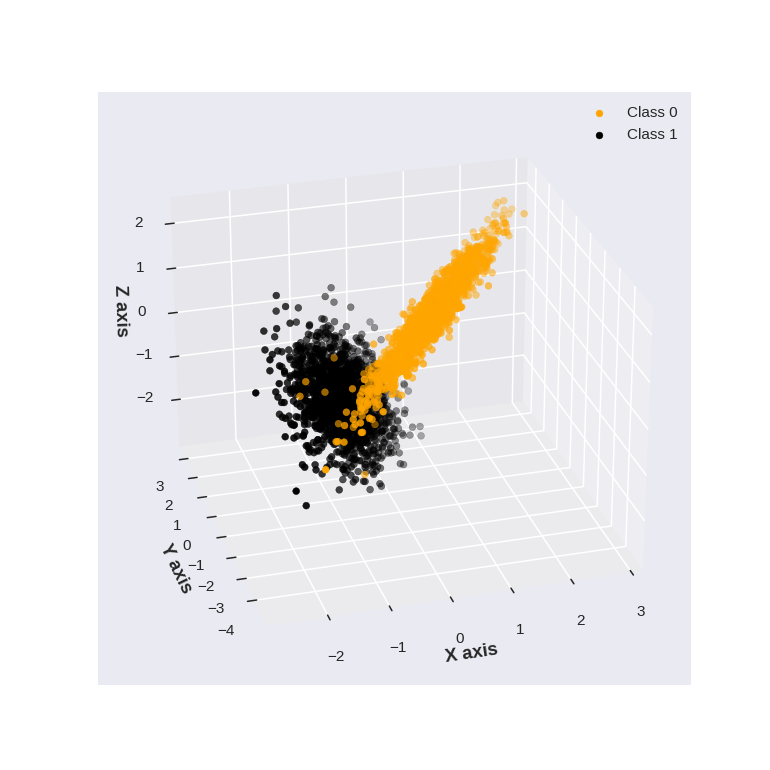

In [83]:
fig = plt.figure(figsize = (7, 7)) # Fig Window size

ax = fig.add_subplot(projection='3d') # Now axes is 3D and ax is its object
ax.scatter(X_train[class0, 0], X_train[class0, 1], X_train[class0, 2], color = "orange", label = "Class 0")
ax.scatter(X_train[class1, 0], X_train[class1, 1], X_train[class1, 2], color = "black", label = "Class 1")
ax.set_xlabel('X axis', fontsize='large', fontweight='bold')
ax.set_ylabel('Y axis', fontsize='large', fontweight='bold')
ax.set_zlabel('Z axis', fontsize='large', fontweight='bold')


ax.legend()
plt.show()


#Its beautiful though 😍️

## Creating Model

### Sigmoid

In [33]:
def Sigmoid(value):
    return (1.0/(1.0 + np.exp(-value)))

### Hypothesis

In [34]:
def Hypothesis(X, theta):
    return Sigmoid(np.dot(X, theta))

### Error

In [35]:
def Error(X, Y, theta):
    
    #print(X.shape, Y.shape, theta.shape)
    hx = Hypothesis(X, theta)    
   # print(hx.shape)
    error = -1 * np.mean((Y * np.log(hx)) + ((1 -Y) * np.log(1 - hx)))
    return error

### Descent

In [36]:
def Descent(X, Y, theta):
    m = X.shape[0]
    hx = Hypothesis(X, theta)
    grad = np.dot(X.T, (Y - hx))
    
    return grad/m

### Gradient Descent

In [51]:
def GradientDescent(X, Y, lr = 0.1, max_itr = 1000):
    
    n = X.shape[1]
    error_list = []
    theta = np.zeros((n, 1))
    
    for i in range(max_itr):
        error_list.append(Error(X, Y, theta))
        
        grad = Descent(X, Y, theta)
        theta = theta + lr * grad
    
    return theta, error_list

### Model Training

In [52]:
# Adding Bias Column
ones = np.ones((X_train.shape[0], 1))

X_new_train = np.hstack((ones, X_train))
print(X_new_train.shape)

(3000, 4)


In [53]:
print(Y_train.shape)

(3000, 1)


In [54]:
theta, Err = GradientDescent(X_new_train, Y_train)

<IPython.core.display.Javascript object>


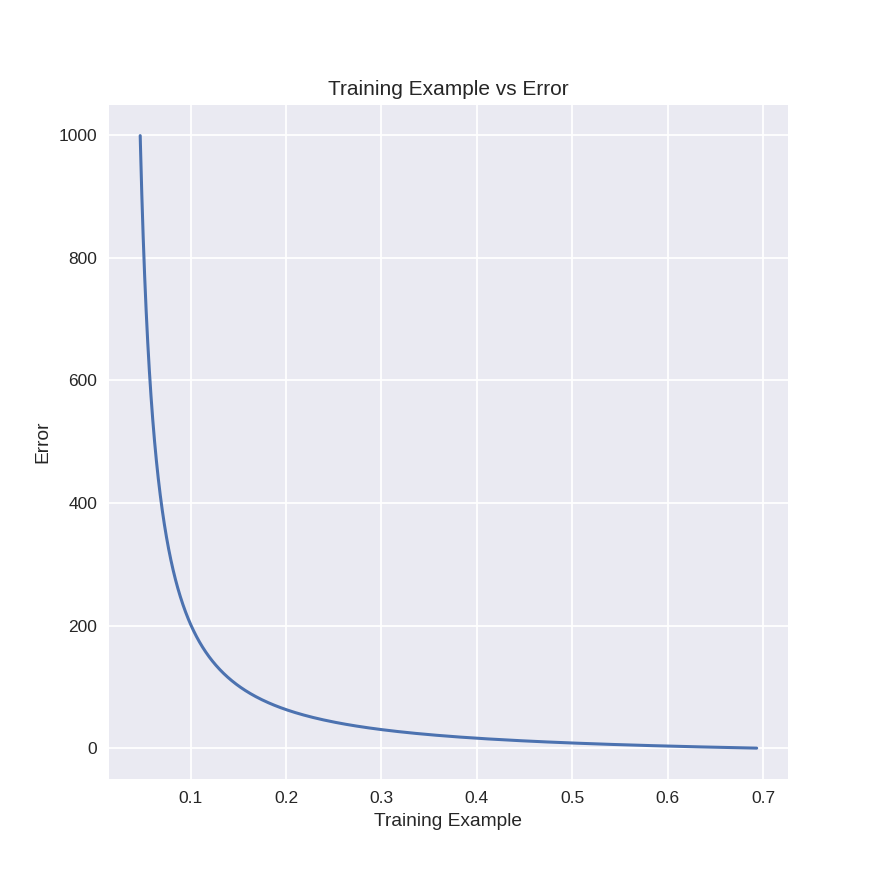

In [60]:
plt.style.use("seaborn")
plt.figure(figsize = (7, 7))
plt.plot(Err, np.arange(0, len(Err), 1, dtype = 'int'))
plt.xlabel("Training Example")
plt.ylabel("Error")
plt.title("Training Example vs Error")
plt.show()